### Data Dictionary

In this exercise, you will copy an existing training experiment from the Azure AI Gallery and run it to train a K‐Means clustering model that segments Rosie’s customers into clusters based on similarities in their features.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style='darkgrid',font_scale=1.25)

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

import scipy.cluster.hierarchy as sch

from mpl_toolkits.mplot3d import Axes3D

pd.set_option('display.max_columns', None) 

In [2]:
df = pd.read_csv("Customers.csv", low_memory=True, encoding='"ISO-8859-1')

In [3]:
df

,CustomerID,Name,Age,AvgWeeklySales,AvgDrinks
0,1,Marva Cardenas,6,2,1
1,2,Francine Fischer,44,4,5
2,3,Kian Goddard,27,4,3
3,4,Jibran Quraishi,6,1,1
4,5,Noreen Branch,51,4,3
...,...,...,...,...,...
104,105,Den Kojima,12,2,1
105,106,Sheldon Comeaux,60,3,1
106,107,Jeannette Kjaer,6,2,1
107,108,Mayra Stephenson,6,4,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      109 non-null    int64 
 1   Name            109 non-null    object
 2   Age             109 non-null    int64 
 3   AvgWeeklySales  109 non-null    int64 
 4   AvgDrinks       109 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 4.4+ KB


In [5]:
X = df.iloc[:,2:5]

In [6]:
X.values

array([[ 6,  2,  1],
       [44,  4,  5],
       [27,  4,  3],
       [ 6,  1,  1],
       [51,  4,  3],
       [28,  1,  1],
       [46,  2,  1],
       [27,  4,  5],
       [55,  3,  3],
       [63,  4,  3],
       [51,  3,  1],
       [16,  2,  1],
       [34,  4,  1],
       [17,  3,  1],
       [ 6,  1,  1],
       [58,  4,  4],
       [61,  4,  5],
       [54,  2,  1],
       [11,  4,  1],
       [ 6,  4,  1],
       [65,  4,  4],
       [ 5,  1,  1],
       [ 7,  1,  1],
       [24,  1,  3],
       [ 5,  2,  1],
       [55,  4,  1],
       [ 7,  4,  1],
       [15,  1,  1],
       [46,  1,  1],
       [65,  3,  1],
       [54,  2,  1],
       [26,  4,  3],
       [25,  2,  1],
       [57,  3,  5],
       [64,  1,  3],
       [39,  1,  1],
       [12,  4,  1],
       [60,  2,  1],
       [ 6,  4,  1],
       [61,  1,  1],
       [25,  4,  1],
       [58,  4,  1],
       [35,  2,  4],
       [51,  1,  3],
       [ 9,  4,  1],
       [54,  3,  1],
       [ 9,  3,  1],
       [ 9,  

In [7]:
scaler = StandardScaler()

In [8]:
X_scaled = scaler.fit_transform(X)

In [9]:
X_scaled

array([[-1.30182904, -0.3521004 , -0.66850778],
       [ 0.60488096,  1.31654931,  2.21732779],
       [-0.24812088,  1.31654931,  0.77441001],
       [-1.30182904, -1.18642525, -0.66850778],
       [ 0.95611702,  1.31654931,  0.77441001],
       [-0.1979443 , -1.18642525, -0.66850778],
       [ 0.70523412, -0.3521004 , -0.66850778],
       [-0.24812088,  1.31654931,  2.21732779],
       [ 1.15682333,  0.48222446,  0.77441001],
       [ 1.55823597,  1.31654931,  0.77441001],
       [ 0.95611702,  0.48222446, -0.66850778],
       [-0.80006325, -0.3521004 , -0.66850778],
       [ 0.10311517,  1.31654931, -0.66850778],
       [-0.74988667,  0.48222446, -0.66850778],
       [-1.30182904, -1.18642525, -0.66850778],
       [ 1.30735307,  1.31654931,  1.4958689 ],
       [ 1.45788281,  1.31654931,  2.21732779],
       [ 1.10664675, -0.3521004 , -0.66850778],
       [-1.05094615,  1.31654931, -0.66850778],
       [-1.30182904,  1.31654931, -0.66850778],
       [ 1.65858912,  1.31654931,  1.495

### Use Dendogram

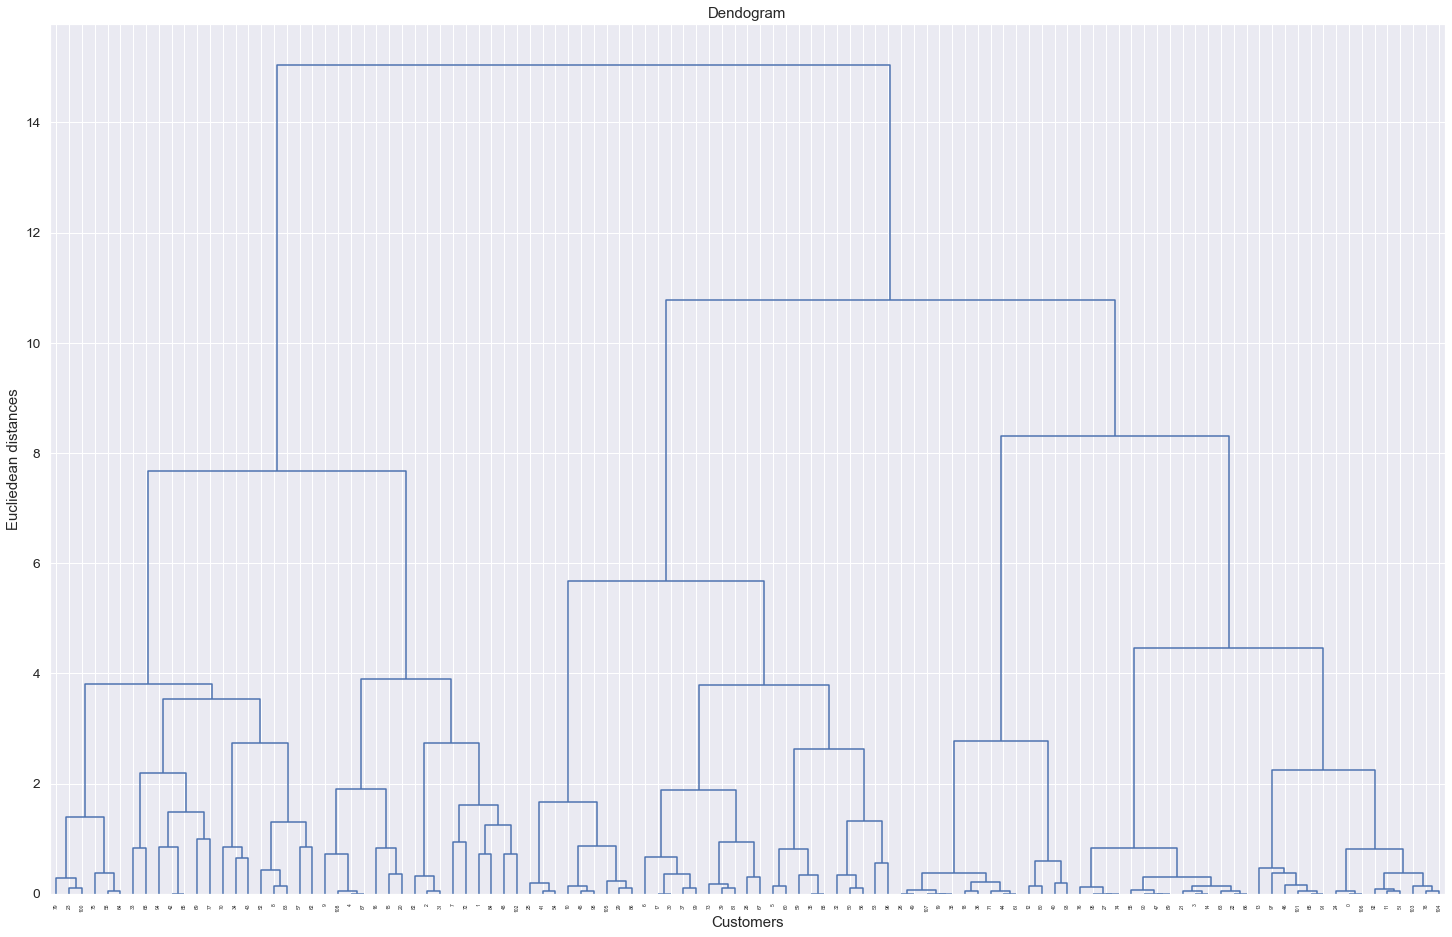

In [10]:
plt.figure(figsize=(25,16))
dendogram = sch.dendrogram(sch.linkage(X_scaled,method='ward'),truncate_mode='level',color_threshold=0)
plt.title("Dendogram")
plt.xlabel("Customers")
plt.ylabel("Eucliedean distances")
plt.show()

### Fitting hierachical cluster

In [11]:
hc = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')

In [12]:
y_hc = hc.fit_predict(X_scaled)

In [13]:
y_hc

array([0, 1, 1, 0, 1, 2, 2, 1, 1, 1, 2, 0, 0, 0, 0, 1, 1, 2, 0, 0, 1, 0,
       0, 1, 0, 2, 0, 0, 2, 2, 2, 1, 2, 1, 1, 2, 0, 2, 0, 2, 0, 2, 1, 1,
       0, 2, 0, 0, 1, 0, 2, 0, 1, 2, 2, 0, 2, 1, 1, 2, 2, 0, 1, 0, 1, 0,
       0, 2, 1, 1, 1, 0, 1, 2, 0, 1, 0, 1, 0, 1, 0, 2, 1, 1, 1, 1, 2, 1,
       2, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 2, 1, 0, 1, 0, 0, 2, 0, 0, 1],
      dtype=int64)

In [14]:
y = pd.DataFrame(y_hc,columns=['Cluster'])

In [15]:
y

,Cluster
0,0
1,1
2,1
3,0
4,1
...,...
104,0
105,2
106,0
107,0


In [16]:
y['Cluster'].unique()

array([0, 1, 2], dtype=int64)

In [17]:
y['Cluster'].value_counts()

0    43
1    37
2    29
Name: Cluster, dtype: int64

In [18]:
newdf = pd.concat([df,y],axis=1)

In [19]:
newdf

,CustomerID,Name,Age,AvgWeeklySales,AvgDrinks,Cluster
0,1,Marva Cardenas,6,2,1,0
1,2,Francine Fischer,44,4,5,1
2,3,Kian Goddard,27,4,3,1
3,4,Jibran Quraishi,6,1,1,0
4,5,Noreen Branch,51,4,3,1
...,...,...,...,...,...,...
104,105,Den Kojima,12,2,1,0
105,106,Sheldon Comeaux,60,3,1,2
106,107,Jeannette Kjaer,6,2,1,0
107,108,Mayra Stephenson,6,4,1,0


In [20]:
meandf = newdf.groupby(by='Cluster').mean()

In [21]:
meandf

,CustomerID,Age,AvgWeeklySales,AvgDrinks
Cluster,,,,
0,57.232558,11.767442,2.465116,1.00000
1,54.081081,42.945946,2.594595,3.72973
2,52.862069,47.827586,2.137931,1.00000


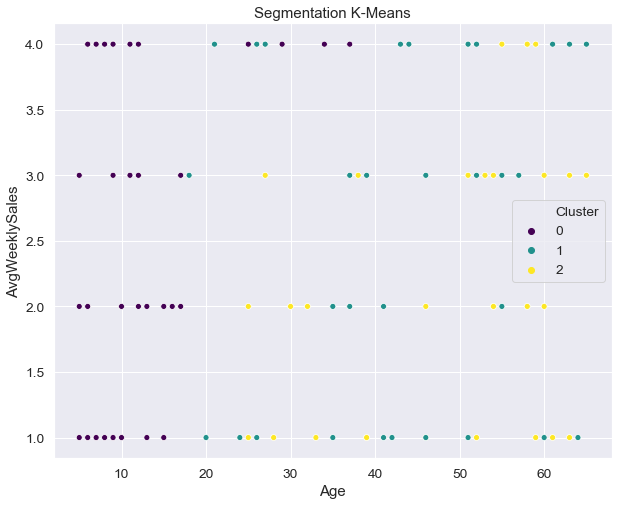

In [22]:
x_axis = newdf['Age']
y_axis = newdf['AvgWeeklySales']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axis,hue=newdf['Cluster'],palette='viridis')
plt.title('Segmentation K-Means')
plt.show()

### K-Means Clustering

In [23]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

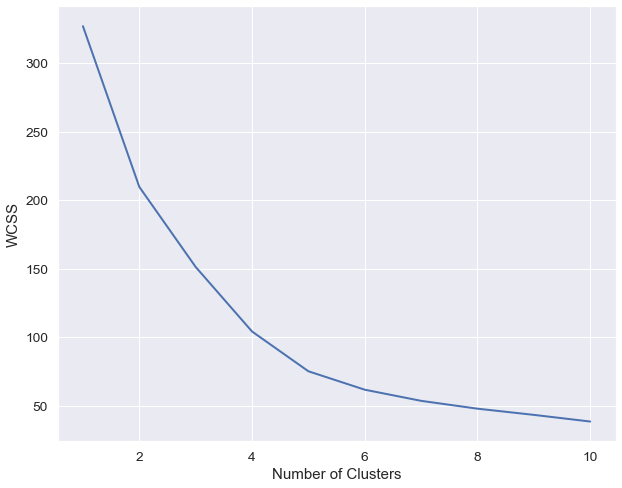

In [24]:
plt.figure(figsize=(10,8))
plt.plot(range(1,11),wcss,linewidth=2)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

### Execute K-Means after determining the suitable cluster

In [25]:
kmeans = KMeans(n_clusters=3,init='k-means++',random_state=0)

In [26]:
kmeans.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

### Results

In [27]:
df_segm_kmeans = df.copy()

In [28]:
df_segm_kmeans

,CustomerID,Name,Age,AvgWeeklySales,AvgDrinks
0,1,Marva Cardenas,6,2,1
1,2,Francine Fischer,44,4,5
2,3,Kian Goddard,27,4,3
3,4,Jibran Quraishi,6,1,1
4,5,Noreen Branch,51,4,3
...,...,...,...,...,...
104,105,Den Kojima,12,2,1
105,106,Sheldon Comeaux,60,3,1
106,107,Jeannette Kjaer,6,2,1
107,108,Mayra Stephenson,6,4,1


In [29]:
df_segm_kmeans['Segment K-Means'] = kmeans.labels_

In [30]:
df_segm_kmeans

,CustomerID,Name,Age,AvgWeeklySales,AvgDrinks,Segment K-Means
0,1,Marva Cardenas,6,2,1,1
1,2,Francine Fischer,44,4,5,2
2,3,Kian Goddard,27,4,3,0
3,4,Jibran Quraishi,6,1,1,1
4,5,Noreen Branch,51,4,3,2
...,...,...,...,...,...,...
104,105,Den Kojima,12,2,1,1
105,106,Sheldon Comeaux,60,3,1,0
106,107,Jeannette Kjaer,6,2,1,1
107,108,Mayra Stephenson,6,4,1,0


In [31]:
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-Means']).mean()

In [32]:
df_segm_analysis

,CustomerID,Age,AvgWeeklySales,AvgDrinks
Segment K-Means,,,,
0,55.823529,27.323529,3.588235,1.176471
1,55.723404,26.085106,1.361702,1.255319
2,52.785714,47.392857,2.785714,3.964286


In [33]:
df_segm_analysis['NoofObservations'] = df_segm_kmeans[['Segment K-Means','Age']].groupby(['Segment K-Means']).count()

In [34]:
df_segm_analysis['ProportionofObservations'] = df_segm_analysis['NoofObservations']/ df_segm_analysis['NoofObservations'].sum()

In [35]:
df_segm_analysis

,CustomerID,Age,AvgWeeklySales,AvgDrinks,NoofObservations,ProportionofObservations
Segment K-Means,,,,,,
0,55.823529,27.323529,3.588235,1.176471,34,0.311927
1,55.723404,26.085106,1.361702,1.255319,47,0.431193
2,52.785714,47.392857,2.785714,3.964286,28,0.256881


In [36]:
df_segm_analysis.rename({0: 'A',
                         1: 'B',
                         2: 'C',
                         },inplace=True)

In [37]:
df_segm_analysis

,CustomerID,Age,AvgWeeklySales,AvgDrinks,NoofObservations,ProportionofObservations
Segment K-Means,,,,,,
A,55.823529,27.323529,3.588235,1.176471,34,0.311927
B,55.723404,26.085106,1.361702,1.255319,47,0.431193
C,52.785714,47.392857,2.785714,3.964286,28,0.256881


In [38]:
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-Means'].map({0: 'A',
                                                                  1: 'B',
                                                                  2: 'C',
                                                                  })

In [39]:
df_segm_kmeans

,CustomerID,Name,Age,AvgWeeklySales,AvgDrinks,Segment K-Means,Labels
0,1,Marva Cardenas,6,2,1,1,B
1,2,Francine Fischer,44,4,5,2,C
2,3,Kian Goddard,27,4,3,0,A
3,4,Jibran Quraishi,6,1,1,1,B
4,5,Noreen Branch,51,4,3,2,C
...,...,...,...,...,...,...,...
104,105,Den Kojima,12,2,1,1,B
105,106,Sheldon Comeaux,60,3,1,0,A
106,107,Jeannette Kjaer,6,2,1,1,B
107,108,Mayra Stephenson,6,4,1,0,A


### Plot the clusters

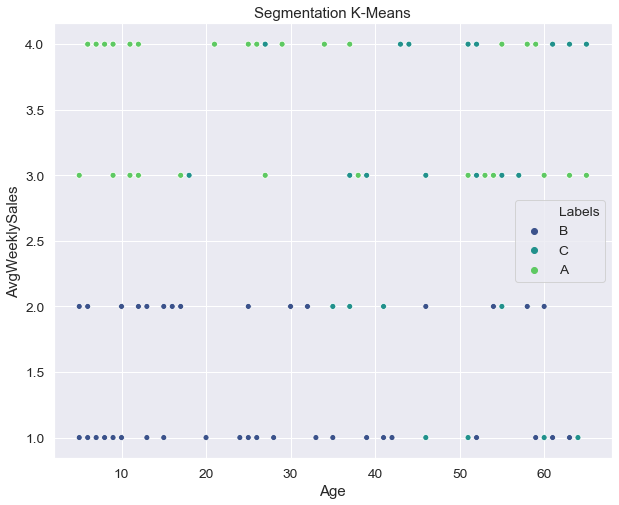

In [40]:
x_axis = df_segm_kmeans['Age']
y_axis = df_segm_kmeans['AvgWeeklySales']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axis,hue=df_segm_kmeans['Labels'],palette='viridis')
plt.title('Segmentation K-Means')
plt.show()

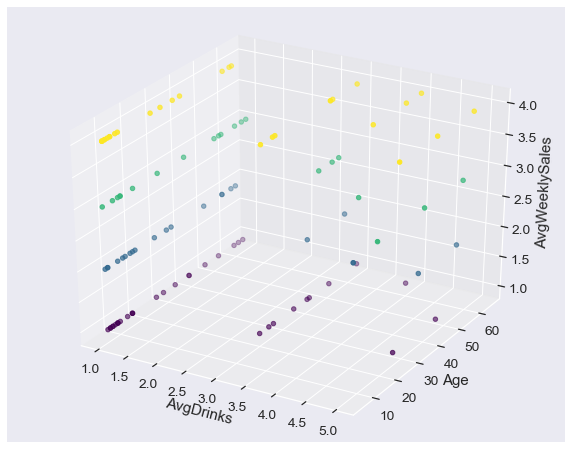

In [41]:
x_axis = df_segm_kmeans['AvgDrinks']
y_axis = df_segm_kmeans['Age']
z_axis = df_segm_kmeans['AvgWeeklySales']

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(x_axis,y_axis,z_axis,c=z_axis, cmap='viridis')

ax.set_xlabel('AvgDrinks')
ax.set_ylabel('Age')
ax.set_zlabel('AvgWeeklySales')

plt.show()